In [1]:
import sailboat as sb # local file sailboat.py
## this is to be able to edit the sailboat.py file and no need to refresh
%load_ext autoreload 
%autoreload 2

In [2]:
# optional: to not request the satelite tile every time
import cartopy.io.img_tiles as cimgt
request = cimgt.GoogleTiles(style='satellite')

In [3]:
import matplotlib.pyplot as plt

# Test querrying the portal
## to get the url (and names for time varibales needed to parse dates): 
sb.gen_url(
    telemetry='min',
    BB3='min',
    CI='min',
    CT='min',
    O2='min',
    path=None,
    date_interval=None,
    limit=100,
)

options for groups of variables are a minimal set ('min'), all variables of the group ('all'), or none (None)


## to request the data from the portal
sb.get_data(path, date_vars=['GPSTimeStamp'])

In [4]:
url, dates = sb.gen_url(limit=1000)
print(url)
df = sb.get_data(url, dates)
df.dtypes

Data variables are: ['GPSTimeStamp']
http://portal.navocean.com/services/nav.php?req=data&id=VELA&columns=GPSTimeStamp%2CLon%2CLat%2CTrack%2CHeading%2CBb%28470%29+%5BNTU%5D%2CBb%28532%29+%5BNTU%5D%2CBb%28650%29+%5BNTU%5D%2CCDOM+%5BQSU%5D%2CChl.+a+%5Bppb%5D%2CPhycocyanin+%5Bppb%5D%2CConductivity+%5BmS+cm-1%5D%2CTemperature+%5Bdeg+C%5D%2CO2+Concentration+%5Bmicromolar%5D&format=csv&output=file&limit=1000&token=5e5c4d86-3fd9-11eb-904e-06ad0ec96835


GPSTimeStamp                     datetime64[ns]
Lon                                     float64
Lat                                     float64
Track                                   float64
Heading                                 float64
Conductivity [mS cm-1]                  float64
Temperature [deg C]                     float64
O2 Concentration [micromolar]           float64
Bb(470) [NTU]                           float64
Bb(532) [NTU]                           float64
Bb(650) [NTU]                           float64
CDOM [QSU]                              float64
Chl. a [ppb]                            float64
Phycocyanin [ppb]                       float64
dtype: object

# "Easy" plots

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


(0.0, 50.0)

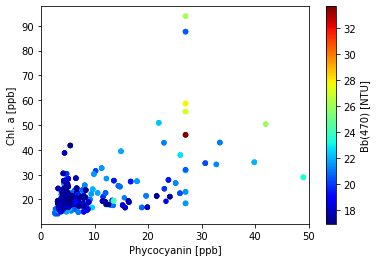

In [5]:
#scatter plot
fig, ax = plt.subplots()
sb.scatter(df, 'phyco', 'chla',ax=ax)
ax.set_xlim(0,50)
# plt.xlim(0,50)

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


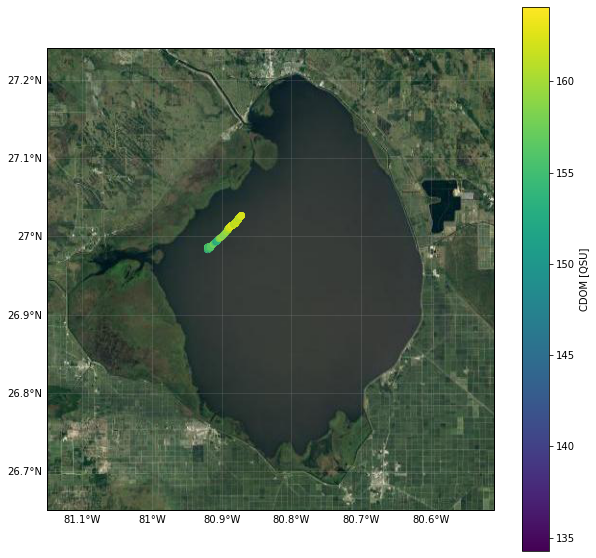

In [6]:
#path plot
sb.plot_path(df, 'cdom')

# Plotting with pandas

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/pandas/plotting/_matplotlib/tools.py:400: MatplotlibDeprecationWarning: 
The is_first_col function was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use ax.get_subplotspec().is_first_col() instead.
  if ax.is_first_col():


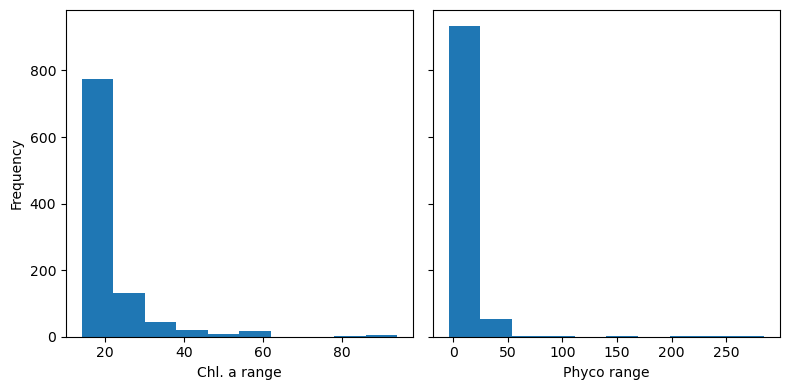

In [7]:
fig, axes = plt.subplots(1,2, figsize=(8,4), dpi=100, sharey=True)
#left
df['Chl. a [ppb]'].plot.hist(ax=axes[0])
axes[0].set_xlabel('Chl. a range')
#right
df['Phycocyanin [ppb]'].plot.hist(ax=axes[1])
axes[1].set_xlabel('Phyco range')
#fit
fig.tight_layout()

# Test loading local files

In [8]:
import glob

## Files downloaded from portal

In [9]:
files = glob.glob('./Data/*.csv')
local = sb.get_data(files)
local['phyco/chla'] = local['Phycocyanin [ppb]']/local['Chl. a [ppb]']
local.dtypes

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
O2 Concentration [micromolar]                       float64
O2 Saturation [%]                                   float64
Bb(470) [NTU]                                       float64
Bb(532) [NTU]                                       float64
Bb(650) [NTU]                                       float64
CDOM [QSU]                                          float64
Chl. a [ppb]                                        float64
Phycocyanin [ppb]                                   float64
local time                       datetime64[ns, US/Eastern]
phyco/chla                                          float64
dtype: object

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)


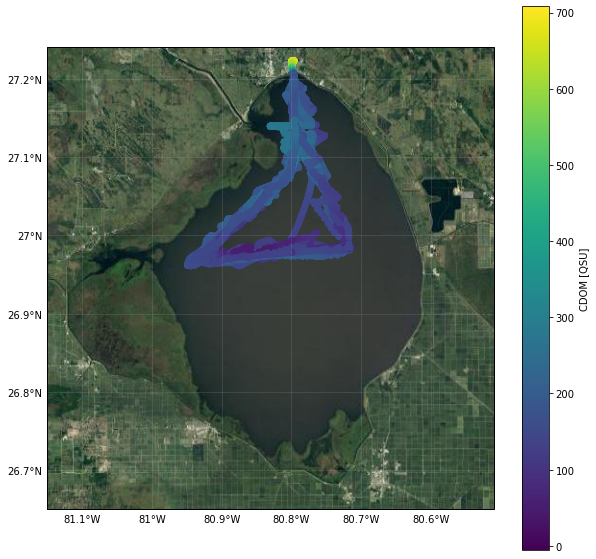

In [10]:
#easy path plot
#subseting a month of data
subset = local[local['local time'].dt.month == 2]
sb.plot_path(subset, 'cdom')

In [23]:
#stuff for animations
from celluloid import Camera
from IPython.display import HTML
#time stuff
from datetime import datetime, timedelta
import calendar
#geographic projections
import cartopy.crs as ccrs

import numpy as np

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._fa

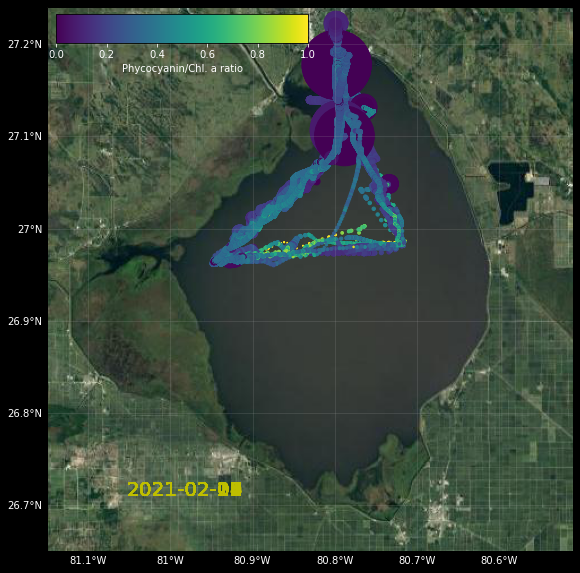

In [65]:
#subseting a month of data
month = 2
subset = local[(local['local time'].dt.year == 2021)&(local['local time'].dt.month == month)]

#plot color setings
back_color='black'
fore_color='white'
plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color

#Create figure
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
fig.patch.set_facecolor(back_color)
#colorbar ax
cax = fig.add_axes([.16, .83, .35, .04])
#for animation initialize camera
camera = Camera(fig)

#satelite image
sb.background(ax=ax, request=request)

# looping through days
ndays = calendar.monthrange(2021, month)[1]
for d in range(ndays):
    day = subset[subset['local time'].dt.day == d+1]
    
#     mpp =sb.plot_path(subset, 'phyco/chla', ax=ax)
    mpp = ax.scatter(day['Lon'], day['Lat'],
                     c=day['phyco/chla'],
                     s=day['Chl. a [ppb]'],
                     vmin=0, vmax=1., #colorbar range
                     transform=ccrs.PlateCarree(),) #x and y are in lat lon coordinates (Plate Carre)

    #check if day has data
    if day.shape[0]>0:
        date = day['local time'].iloc[0] #extract date
    else:
        date += timedelta(days=1) #if no data for day, still plot date on canvas

    #write date label
    ax.text(.15, .1, str(date)[:-15], fontsize=20, c='y', transform=ax.transAxes)
    #colorbar
    fig.colorbar(mpp, cax=cax,orientation='horizontal', label='Phycocyanin/Chl. a ratio')
    #snap camera for animation
    camera.snap()

In [66]:
anim = camera.animate(interval=1000)
# anim.save(calendar.month_abbr[month]+'_pcratio.mp4')
HTML(anim.to_html5_video())

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


In [67]:
anim.save(calendar.month_abbr[month]+'_pcratio.mp4')

/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/cartopy/mpl/geoaxes.py:388: MatplotlibDeprecationWarning: 
The 'inframe' parameter of draw() was deprecated in Matplotlib 3.3 and will be removed two minor releases later. Use Axes.redraw_in_frame() instead. If any parameter follows 'inframe', they should be passed as keyword, not positionally.
  inframe=inframe)
/Users/hboi/miniconda3/envs/owl/lib/python3.7/site-packages/matplotlib/collections.py:1003: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


## Event files

In [38]:
path = '/Users/hboi/OneDrive - Florida Atlantic University/HALO/navocean/Vela Sample Analysis Data and Results/'
mc = 'April Canal Point Microcystis/'
an = 'April Taylor Creek Anabaena/'

['/Users/hboi/OneDrive - Florida Atlantic University/HALO/navocean/Vela Sample Analysis Data and Results/April Canal Point Microcystis/Vela Sensor Data During Samples CanalPoint Apr26 2021.csv']

In [68]:
files = glob.glob(path+mc+'*.csv')
df_M = sb.get_data(files)
df_M.dtypes

GPSTimeStamp                                 datetime64[ns]
Lon                                                 float64
Lat                                                 float64
Speed                                               float64
Track                                               float64
Heading                                             float64
Pitch                                               float64
Roll                                                float64
WindTrueSpeed                                       float64
WindTrueDir                                         float64
PressureInches                                        int64
AirTemp                                             float64
BB3 [Time UTC]                                       object
Bb(470) [counts]                                      int64
Bb(532) [counts]                                      int64
Bb(650) [counts]                                      int64
CI [Time UTC]                           

In [69]:
df_M['phyco/chla'] = df_M['Phycocyanin [counts]']/df_M['Chl. a [counts]']

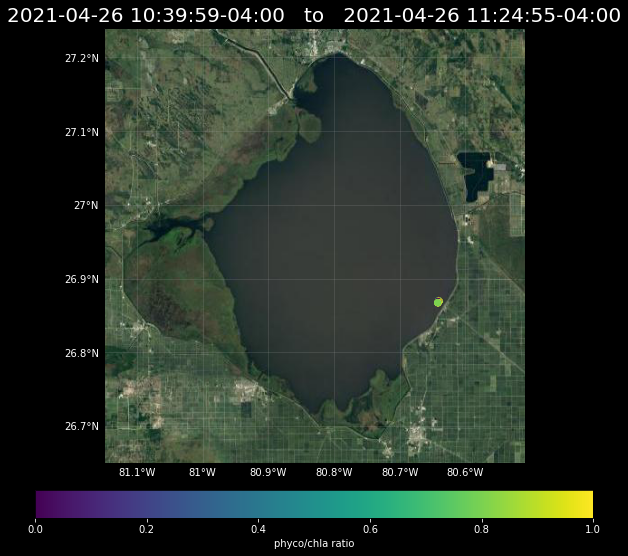

In [70]:
fig = plt.figure(figsize=(10, 10))
ax = plt.axes(projection=request.crs)
fig.patch.set_facecolor(back_color)
sb.background(ax=ax,request = request)
# sb.plot_path(df, 'phyco/chla', ax=ax)
mpp = ax.scatter(df_M['Lon'], df_M['Lat'],
               c=df_M['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
ax.set_title(str(df_M['local time'].iloc[-1]) + '   to   ' +str(df_M['local time'].iloc[0]), size= 20)
cb = fig.colorbar(mpp, location='bottom', pad=.05)
cb.set_label('phyco/chla ratio')


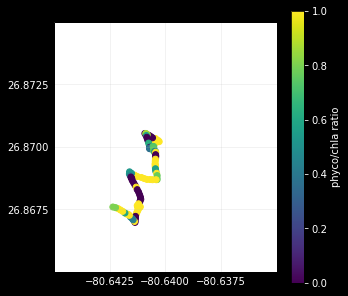

In [71]:
fig = plt.figure(figsize=(5, 5))
fig.patch.set_facecolor(back_color)
ax = plt.axes(projection=request.crs)
ax.set_extent([-80.645, -80.635,26.865, 26.875])
mapp = ax.scatter(df_M['Lon'], df_M['Lat'],
               c=df_M['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
cb = fig.colorbar(mapp,)
cb.set_label('phyco/chla ratio',)
# cb.ax.tick_params(labelcolor='cyan')
gl = ax.gridlines(draw_labels=True, alpha=0.2,
                  ylocs=[26.865, 26.8675, 26.87, 26.8725, 26,875],
                 xlocs=[-80.645, -80.6425, -80.64, -80.6375, -80.635, ]
                 )
# ax.set_xticks([26.8676, 26.87, 26.8725])
gl.xlabels_top = gl.ylabels_right = False

Text(0.5, 120.72222222222207, 'Chl. a [ppb]')

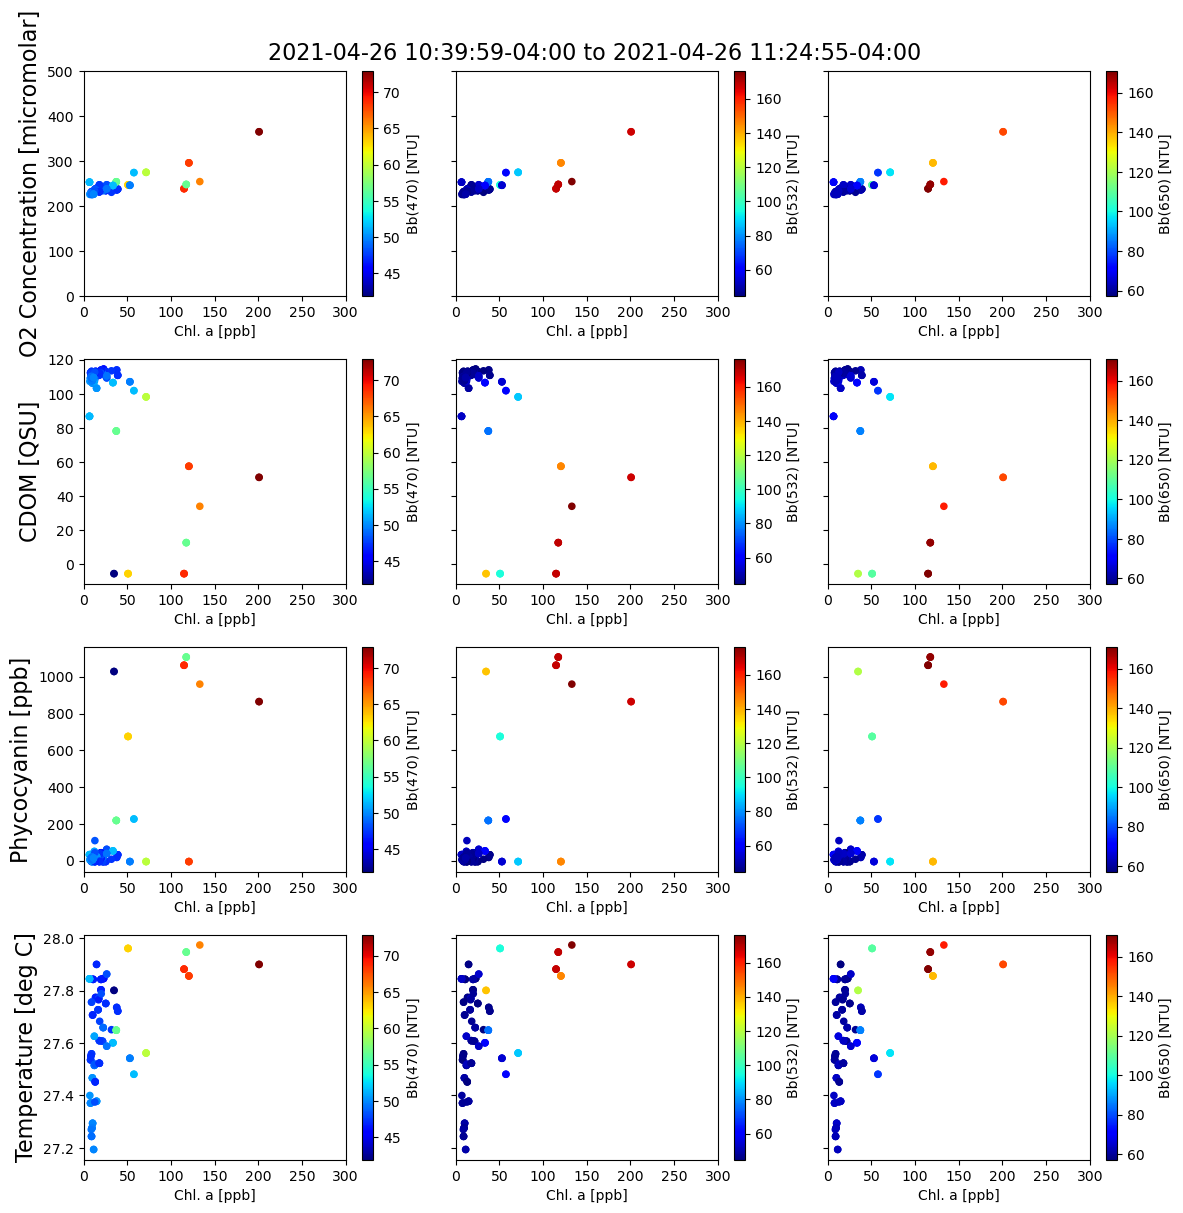

In [102]:
fore_color='black'
# fore_color='white'
plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color

fig, axes = plt.subplots(4, 3, dpi=100, 
                         sharey='row',
                         figsize=(12,12))

y_vars = ['O2', 'cdom', 'phyco', 'temp']
c_vars = ['bb470', 'bb532', 'bb650']

for i, y_var in enumerate(y_vars):
    for j, c_var in enumerate(c_vars):
        sb.scatter(df_M, 'chla', y_var, z_var=c_var, ax = axes[i,j])
        axes[i,j].yaxis.get_label().set_fontsize(16)
        axes[i,j].set_xlim(0,300)


fig.suptitle(str(df_M['local time'].iloc[-1])+' to '+ str(df_M['local time'].iloc[0]), fontsize=16)
fig.tight_layout()
axes[0, 1].set_ylim(0, 500)
axes[-1,-1].set_xlim(0,300)
axes[-1,-1].set_xlabel('Chl. a [ppb]')

# local['Phycocyanin [ppb]']/local['Chl. a [ppb]']
# ax.tick_params(labelcolor='cyan')
# mpl.rcParams['text.color'] = 'cyan'
# mpl.rc('xtick', labelsize=20) 
# mpl.rc('ytick', labelsize=20) 

In [60]:
file2 = glob.glob(path+an+'*.csv')
df2 = sb.get_data(file2)
df2['phyco/chla'] = df2['Phycocyanin [counts]']/df2['Chl. a [counts]']

Text(0.5, 1.0, '2021-04-21 12:00:01-04:00   to   2021-04-21 13:59:48-04:00')

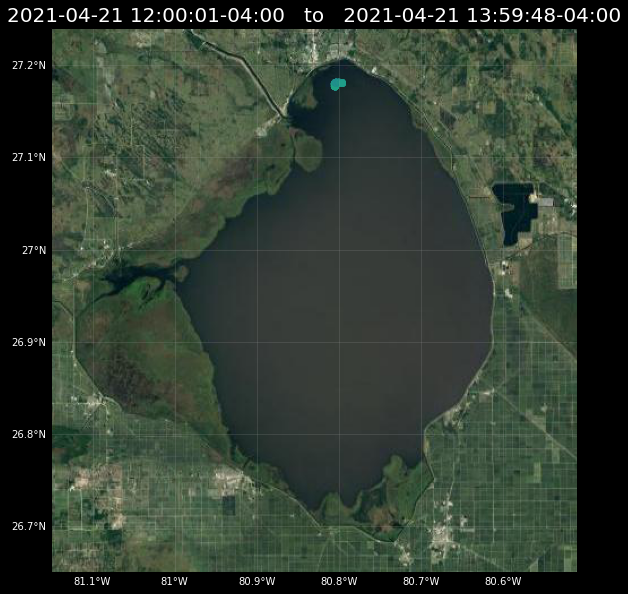

In [61]:
fig = plt.figure(figsize=(10, 10))
fig.patch.set_facecolor(back_color)
ax = plt.axes(projection=request.crs)
sb.background(extent = [-81.15, -80.51,26.65, 27.24], ax=ax, 
           request = request)
ax.scatter(df2['Lon'], df2['Lat'],
               c=df2['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
ax.set_title(str(df2['local time'].iloc[-1]) + '   to   ' +str(df2['local time'].iloc[0]), size= 20)

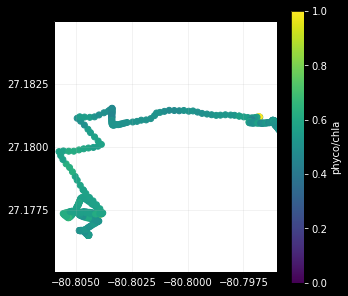

In [64]:
fig = plt.figure(figsize=(5, 5))
fig.patch.set_facecolor(back_color)
ax = plt.axes(projection=request.crs)
ax.set_extent([-80.806, -80.796, 27.175, 27.185])
mapp = ax.scatter(df2['Lon'], df2['Lat'],
               c=df2['phyco/chla'],
               vmin=0, vmax=1.,
               transform=ccrs.PlateCarree(),)
cb = fig.colorbar(mapp, label='phyco/chla')
# cb.set_label('phyco/chla', size = 20, color='cyan')
# cb.ax.tick_params(labelcolor='cyan')
gl = ax.gridlines(draw_labels=True, alpha=0.2,
                  ylocs=np.arange(27.175 , 27.1875, 0.0025),
                 xlocs=np.arange(-80.8075, -80.79, 0.0025),
                 )
gl.xlabels_top = gl.ylabels_right = False

Text(0.5, 144.44444444444431, 'Chl. a [ppb]')

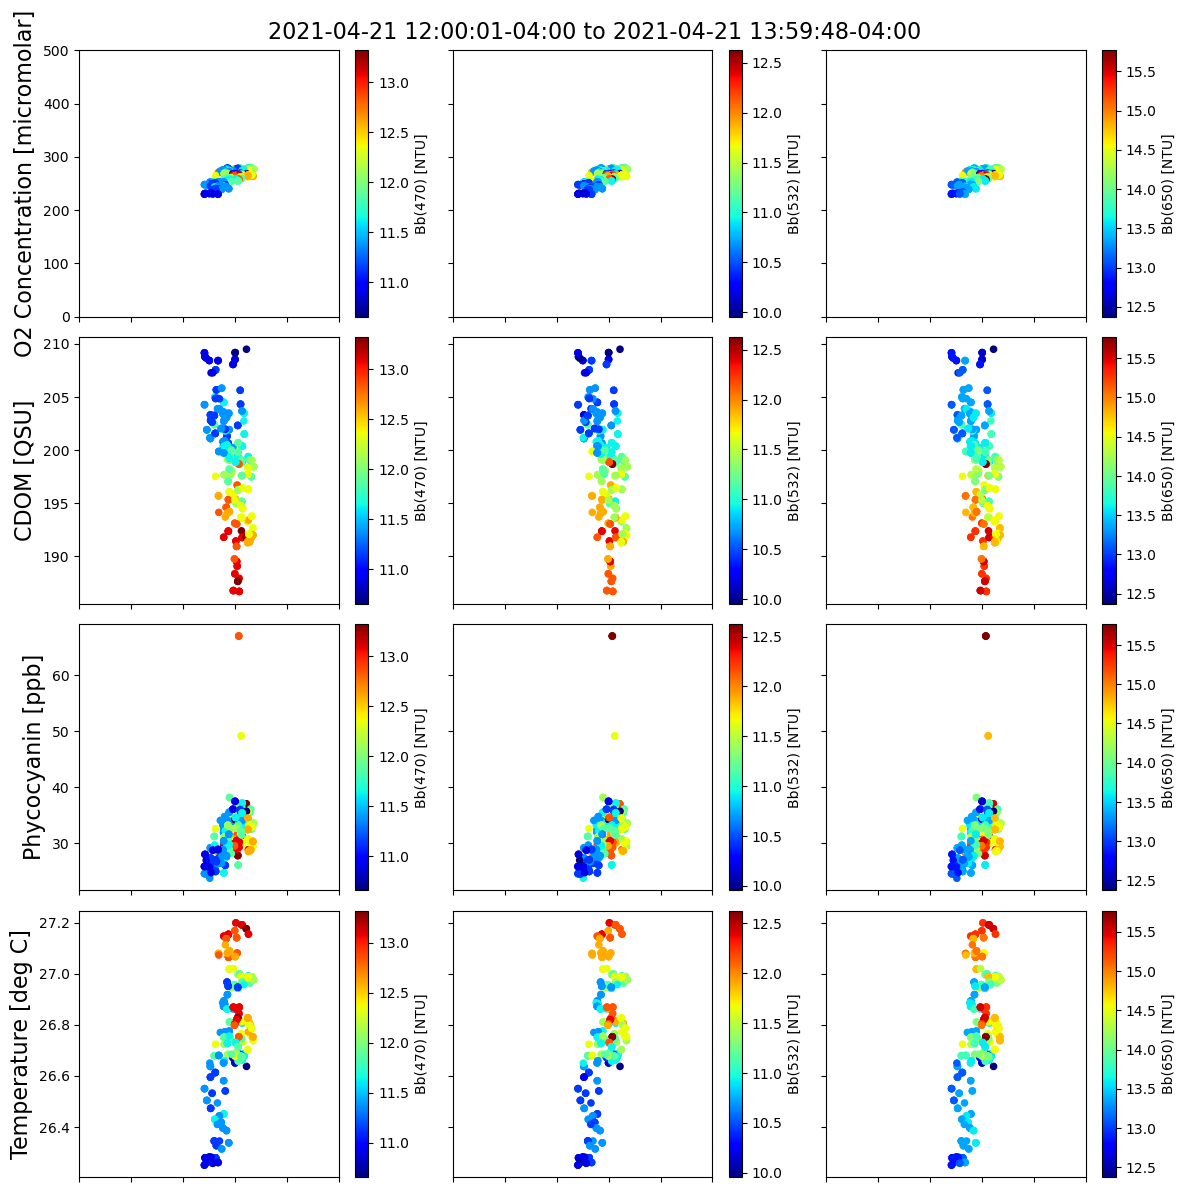

In [100]:
fore_color='black'
# fore_color='white'
plt.rcParams["text.color"] = fore_color
plt.rcParams["axes.labelcolor"] = fore_color
plt.rcParams["xtick.color"] =  fore_color
plt.rcParams["ytick.color"] = fore_color
fig, axes = plt.subplots(4, 3, dpi=100, 
                         sharey='row',
                         figsize=(12,12))

y_vars = ['O2', 'cdom', 'phyco', 'temp']
c_vars = ['bb470', 'bb532', 'bb650']

for i, y_var in enumerate(y_vars):
    for j, c_var in enumerate(c_vars):
        sb.scatter(df2, 'chla', y_var, z_var=c_var, ax = axes[i,j])
        axes[i,j].yaxis.get_label().set_fontsize(16)
        axes[i,j].set_xlim(0,300)

fig.suptitle(str(df2['local time'].iloc[-1])+' to '+ str(df2['local time'].iloc[0]), fontsize=16)
fig.tight_layout()
axes[0, 1].set_ylim(0, 500)
axes[-1,-1].set_xlim(0,100)
# axes[-1,-1].xaxis.set_ticks(np.arange(0,301, 100))
axes[-1,-1].set_xlabel('Chl. a [ppb]')

In [87]:
np.arange(0,301, 100)

array([  0, 100, 200, 300])